<h3 align="right"> October 19, 2019  </h3> 

<h3 align="center"> Portfolio Theory and Risk Management I </h3> 

<h3 align="center"> HW 2 Solution.  </h3> 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

# monthly excess return data for the overall equity market
factors_df = pd.read_excel('portfoliosFF.xlsx', 'FACTORS', index='Dates')
factors_df = factors_df.set_index('Dates')

# monthly excess return data on 10 equity portfolios sorted by their size-value
size_df = pd.read_excel('portfoliosFF.xlsx', 'SIZE-VALUE', index='Dates')
size_df = size_df.set_index('Dates')

# monthly excess return data on 10 equity portfolios sorted by their market-beta values
beta_df = pd.read_excel('portfoliosFF.xlsx', 'BETA', index='Dates') 
beta_df = beta_df.set_index('Dates')

df = pd.concat([factors_df, size_df], sort=False, axis=1)
df.tail(3)

,Excess MKT,decile 1,decile 2,decile 3,decile 4,decile 5,decile 6,decile 7,decile 8,decile 9,decile 10
Dates,,,,,,,,,,,
2018-06-30,0.0048,0.0163,0.0048,0.0195,0.0052,-0.0052,0.0052,0.0066,-0.0014,-0.0214,-0.0129
2018-07-31,0.0319,0.0354,0.0157,0.0484,0.0476,0.0328,0.0280,0.0177,0.0405,0.0400,0.0341
2018-08-31,0.0344,0.0633,0.0610,0.0199,0.0303,0.0215,0.0192,0.0082,0.0053,0.0120,0.0160


## 1. Summary Statistics. 
**For each portfolio, calculate both the Sharpe Ratio and Treynor Ratio.**

$$ SR_i = \frac{\mathbf{r_i} - \mathbf{r}^f}{\sigma_i} = \frac{\tilde{\mu_i}}{\sigma_i} $$

$$ TR = \frac{\mathbf{r_i} - \mathbf{r}^f}{\beta_{i,m}} = \frac{\tilde{\mu_i}}{\beta_{i,m}} $$

In [19]:
SR_TR = pd.DataFrame(index = size_df.columns)

rhs = sm.add_constant(df['Excess MKT'])

for portfolio in SR_TR.index:
    lhs = df[portfolio]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    SR_TR.loc[portfolio, 'beta_hat'] = res.params['Excess MKT']
    SR_TR.loc[portfolio, 'volatility'] = df[portfolio].std()*np.sqrt(12) # annualize
    SR_TR.loc[portfolio, 'ave_excess_ret'] = df[portfolio].mean()*12 # annualize
    SR_TR.loc[portfolio, 'SR'] = SR_TR.loc[portfolio, 'ave_excess_ret'] / SR_TR.loc[portfolio, 'volatility']
    SR_TR.loc[portfolio, 'TR'] = SR_TR.loc[portfolio, 'ave_excess_ret'] / SR_TR.loc[portfolio, 'beta_hat']
SR_TR

,beta_hat,volatility,ave_excess_ret,SR,TR
decile 1,1.008719,0.196346,0.105161,0.535590,0.104252
decile 2,0.944682,0.182766,0.117659,0.643766,0.124548
decile 3,0.965873,0.185520,0.116240,0.626564,0.120347
decile 4,1.045314,0.203904,0.112173,0.550128,0.107311
decile 5,0.999567,0.196158,0.120817,0.615915,0.120869
decile 6,1.027670,0.206747,0.128362,0.620866,0.124906
decile 7,1.096930,0.221544,0.119077,0.537487,0.108555
decile 8,1.138070,0.231385,0.143277,0.619214,0.125894
decile 9,1.275712,0.264485,0.159861,0.604421,0.125311
decile 10,1.460254,0.317455,0.160239,0.504761,0.109733


## (a) 
**Make a plot with the SR of each asset on the horizontal axis, and the TR on the vertical
axis.**

Text(0, 0.5, 'Treynor Ratio')

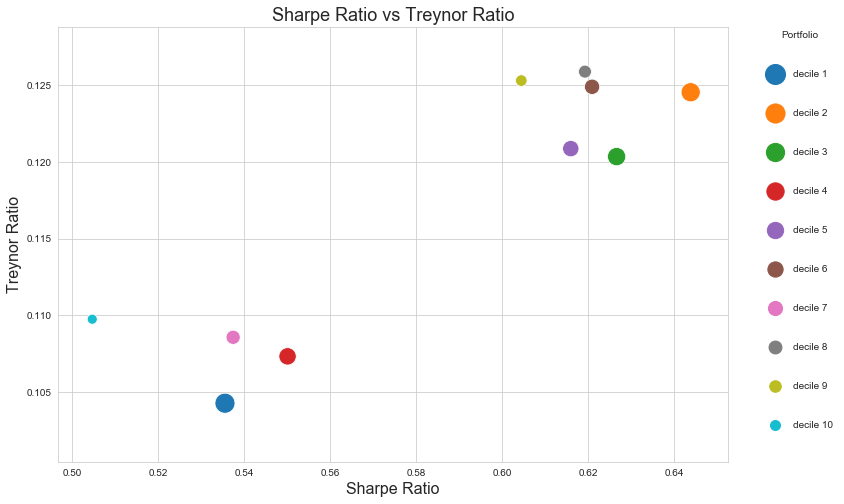

In [20]:
fig, ax = plt.subplots(figsize= (12,8))
sns.scatterplot(y='TR', x='SR', data=SR_TR, hue=SR_TR.index, size=SR_TR.index, 
                sizes=(100, 400), legend='full', 
                markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1'])
plt.legend(scatterpoints=1, frameon=False, labelspacing=3, title='Portfolio', 
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Sharpe Ratio vs Treynor Ratio', fontsize=18)
ax.set_xlabel("Sharpe Ratio",fontsize=16)
ax.set_ylabel("Treynor Ratio",fontsize=16)

## (b)
**What do you observe? What would the CAPM predict about this plot?.**

In [21]:
printmd('**1. We observe correspondence of Sharpe and Treynor ratios, i.e., low Sharpe Rato corresponds to low Treynor Ratio and vice versa. We also see that portfolios are "clustered" in terms of magnitude of SR and TR: low ratio cluster and high ratio cluster.**', color='blue')

printmd("**2. CAPM says that portfolios' Sharpe ratios should be proportional to market portfolio Sharpe ratio in amount equal to correlation between portfolio under consideration and market portfolio. However, it does not fully true for our data as can be seen from the table below.**", color='blue')
        
printmd('Market portfolio SR = {:.4f}'.format(df['Excess MKT'].mean()*12 / (np.sqrt(12)*df['Excess MKT'].std())), color='blue')
market_SR = df['Excess MKT'].mean()*12 / (np.sqrt(12)*df['Excess MKT'].std())
CAPM_SR = pd.DataFrame(index = size_df.columns, columns=['CAPM implied SR', 'Actual SR'])
for portfolio in df:
    if portfolio != 'Excess MKT':
        CAPM_SR.loc[portfolio]['CAPM implied SR'] = market_SR * df[portfolio].corr(df['Excess MKT'])
        CAPM_SR.loc[portfolio]['Actual SR'] = SR_TR.loc[portfolio]['SR']        
display(CAPM_SR)

printmd('**3. CAPM also says that Treynor ratio should be the same for all portfolios because beta exposure of portfolio is compensated with the same market premium. However, we see that it does not hold for our data, i.e., Treynor Ratios are different for all 10 portfolios under consideration.**', color='blue')

<span style='color:blue'>**1. We observe correspondence of Sharpe and Treynor ratios, i.e., low Sharpe Rato corresponds to low Treynor Ratio and vice versa. We also see that portfolios are "clustered" in terms of magnitude of SR and TR: low ratio cluster and high ratio cluster.**</span>

<span style='color:blue'>**2. CAPM says that portfolios' Sharpe ratios should be proportional to market portfolio Sharpe ratio in amount equal to correlation between portfolio under consideration and market portfolio. However, it does not fully true for our data as can be seen from the table below.**</span>

<span style='color:blue'>Market portfolio SR = 0.4322</span>

,CAPM implied SR,Actual SR
decile 1,0.409982,0.53559
decile 2,0.412484,0.643766
decile 3,0.415476,0.626564
decile 4,0.409109,0.550128
decile 5,0.406653,0.615915
decile 6,0.396673,0.620866
decile 7,0.395127,0.537487
decile 8,0.392511,0.619214
decile 9,0.384918,0.604421
decile 10,0.367083,0.504761


<span style='color:blue'>**3. CAPM also says that Treynor ratio should be the same for all portfolios because beta exposure of portfolio is compensated with the same market premium. However, we see that it does not hold for our data, i.e., Treynor Ratios are different for all 10 portfolios under consideration.**</span>

**(c) From these measures, which portfolios look attractive? Which look unattractive?**

In [22]:
printmd("**SHARPE RATIO measures portfolio's risk-adjusted returns: the higher SR the higher compensation per unit of risk. Thus, in terms of SR portfolio 'DECILE 2' seems to be the most attractive one, and portfolio 'DECILE 10' - the least attractive one.**",color='blue')

printmd("**TREYNOR RATIO measures portfolio`s return in excess of priced risk: again, the higher TR the more attracive portfolio is. Thus, in terms of TR portfolio 'DECILE 8' looks as the most attractive one, and portfolio 'DECILE 1' as the least attractive one.**",color='blue')

<span style='color:blue'>**SHARPE RATIO measures portfolio's risk-adjusted returns: the higher SR the higher compensation per unit of risk. Thus, in terms of SR portfolio 'DECILE 2' seems to be the most attractive one, and portfolio 'DECILE 10' - the least attractive one.**</span>

<span style='color:blue'>**TREYNOR RATIO measures portfolio`s return in excess of priced risk: again, the higher TR the more attracive portfolio is. Thus, in terms of TR portfolio 'DECILE 8' looks as the most attractive one, and portfolio 'DECILE 1' as the least attractive one.**</span>

## 2. For each of the n = 10 test portfolios, run the CAPM time-series regression 

**from the lecture:** 
$$ \tilde{r}^i_t = \alpha^i + \beta^{i,M} \tilde{r}_t^M + \epsilon_t^i  $$

**So you are running 10 separate regressions, each using the T-sized sample of time-series data.**

## (a)
**Use the estimated as well as the historic average of** $ \tilde{r}^M $ **to calculate** $ E[\tilde{r}^i] $ **as implied by the CAPM.**

$$ E^{CAPM}[\tilde{r}^i] = \beta^{i,M}\lambda^{M} $$

**,where** $\lambda^M = \frac{1}{T} \sum_{t=1}^{T} \tilde{r}^M$

In [23]:
reg_results = pd.DataFrame(index = size_df.columns)
rhs = sm.add_constant(df['Excess MKT'])
ave_excess_mkt_ret = df['Excess MKT'].mean() * 12 # lambda from the formula above (annualized)
print('Average excess market return = {:.4f} = {:.4f}%'.format(ave_excess_mkt_ret, ave_excess_mkt_ret*100))

residuals = pd.DataFrame(columns = size_df.columns)
t_p_values = pd.DataFrame()

for portfolio in reg_results.index:
    lhs = df[portfolio]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    reg_results.loc[portfolio, 'beta_hat'] = res.params['Excess MKT']
    reg_results.loc[portfolio, 'alpha_hat'] = res.params['const']
    residuals[portfolio] = res.resid

    reg_results.loc[portfolio, 'HISTORIC_mean_excess_return'] = df[portfolio].mean()*12
    reg_results.loc[portfolio, 'CAPM_implied_excess_ret'] = ave_excess_mkt_ret * reg_results.loc[portfolio, 'beta_hat']
    
    t_p_values.loc[portfolio, 't-value'] = res.params['const']
    t_p_values.loc[portfolio, 't-value'] = res.tvalues['const']
    t_p_values.loc[portfolio, 'p-value'] = round(res.pvalues['const'], 4)
    
# t_p_values
reg_results

Average excess market return = 0.0798 = 7.9803%


,beta_hat,alpha_hat,HISTORIC_mean_excess_return,CAPM_implied_excess_ret
decile 1,1.008719,0.002055,0.105161,0.080498
decile 2,0.944682,0.003523,0.117659,0.075388
decile 3,0.965873,0.003263,0.116240,0.077079
decile 4,1.045314,0.002396,0.112173,0.083419
decile 5,0.999567,0.003421,0.120817,0.079768
decile 6,1.027670,0.003863,0.128362,0.082011
decile 7,1.096930,0.002628,0.119077,0.087538
decile 8,1.138070,0.004371,0.143277,0.090821
decile 9,1.275712,0.004838,0.159861,0.101805
decile 10,1.460254,0.003642,0.160239,0.116532


## (b)
**Plot this along the horizontal axis with the actual historic mean return of** $\tilde{r}^i$ **on the vertical
axis.**

Text(0, 0.5, 'Historic mean excess return')

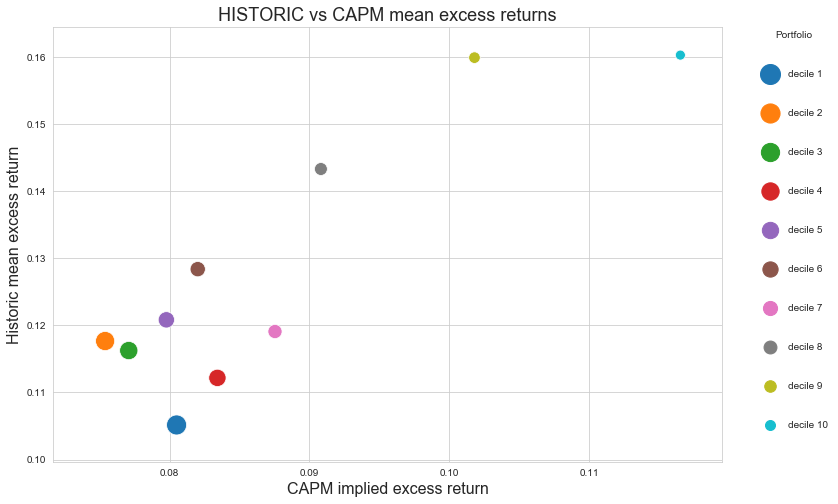

In [24]:
fig, ax = plt.subplots(figsize= (12,8))
g = sns.scatterplot(y='HISTORIC_mean_excess_return', x='CAPM_implied_excess_ret', 
                    data=reg_results, hue=reg_results.index, size=reg_results.index, 
                sizes=(100, 400), legend='full');
plt.legend(scatterpoints=1, frameon=False, labelspacing=3, title='Portfolio', 
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('HISTORIC vs CAPM mean excess returns', fontsize=18)
ax.set_xlabel("CAPM implied excess return",fontsize=16)
ax.set_ylabel("Historic mean excess return",fontsize=16)

## 3. Measure how well the model performs.

## (a)
**Report the mean-absolute-error of the CAPM:**

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |\alpha_i| $$

In [25]:
mean_absolute_error = reg_results['alpha_hat'].mean() * 12 # annualized
printmd('**Annualzed Mean Absolute Error (MAE) of CAPM = {:.2f}%**'.format(mean_absolute_error*100), color='blue')

<span style='color:blue'>**Annualzed Mean Absolute Error (MAE) of CAPM = 4.08%**</span>

## (b)
**Under classic statistical assumptions, we can test the null hypothesis that the CAPM works
by calculating,**

$$ H = T[1+(SR_M)^2]^{-1} \alpha^T \Sigma_{\epsilon}^{-1} \alpha $$
$$ H \sim \mathcal{X}_n^2 $$

$H_0 : H \sim 0$

In [26]:
alpha = reg_results['alpha_hat']
alpha = np.array(alpha).reshape(alpha.shape[0], -1)
print('Check: \n aplha shape:', alpha.shape)
Sigma = residuals.cov() # not annualized
print(' Sigma shape:', Sigma.shape)

T = df.shape[0] # T-sized sample of time-series data
print(' T =', T)

# Calculate SR_M
excess_mkt_ret_std = df['Excess MKT'].std() # not annualized
excess_mkt_ret_mean = df['Excess MKT'].mean() # not annualized
SR_M = excess_mkt_ret_mean / excess_mkt_ret_std

SR_M_inv = T * (1 + SR_M**2)**(-1)
a_s_a = alpha.T @ inv(Sigma) @ alpha
H = SR_M_inv * a_s_a
printmd('**H = {:.2f}**'.format(H[0][0]), color='blue') 

from scipy.stats import chi2
p_value = (1 - chi2.cdf(H, df=10))[0][0]
printmd('**p-value ( H ) = {:.4f}**'.format(p_value), color='blue')
printmd('**p-value is 0, that is why we can REJECT H0 hypothesis at all (1%, 5%, 10%) signifcance levels.**',color='blue')

Check: 
 aplha shape: (10, 1)
 Sigma shape: (10, 10)
 T = 1106


<span style='color:blue'>**H = 358.75**</span>

<span style='color:blue'>**p-value ( H ) = 0.0000**</span>

<span style='color:blue'>**p-value is 0, that is why we can REJECT H0 hypothesis at all (1%, 5%, 10%) signifcance levels.**</span>

## (c)
**Which is a stricter test: checking whether any of the n values of** $\alpha_i$ **have a statistically
significant t-test or checking whether H calculated above is significant?**

In [27]:
printmd("**JOINT TEST is a stricter test in comparison to individual tests of alphas. It follows from definition, and leads to possibility that some or even all alphas can be insignificant according to individual tests, while the joint test will say that all alphas are jontly significant.**",color='blue')

printmd('t- and p-values for indvidual condtions testing:', color='blue')
display(t_p_values)
printmd('**We can see that all p-values are almost zero and all t-values are far from zero, \
that is why we can conclude that ALL ALPHAS ARE SIGNFICANT when testing them INDVIDUALLY. However, portfolio "DECILE 10" can be considered insignificant at 1% signifcance level.**', color='blue')

<span style='color:blue'>**JOINT TEST is a stricter test in comparison to individual tests of alphas. It follows from definition, and leads to possibility that some or even all alphas can be insignificant according to individual tests, while the joint test will say that all alphas are jontly significant.**</span>

<span style='color:blue'>t- and p-values for indvidual condtions testing:</span>

,t-value,p-value
decile 1,3.780539,0.0002
decile 2,7.379503,0.0000
decile 3,7.301271,0.0000
decile 4,4.165356,0.0000
decile 5,5.884582,0.0000
decile 6,5.376992,0.0000
decile 7,3.345428,0.0008
decile 8,5.156880,0.0000
decile 9,4.595476,0.0000
decile 10,2.483100,0.0132


<span style='color:blue'>**We can see that all p-values are almost zero and all t-values are far from zero, that is why we can conclude that ALL ALPHAS ARE SIGNFICANT when testing them INDVIDUALLY. However, portfolio "DECILE 10" can be considered insignificant at 1% signifcance level.**</span>

## (d)
**Conceptually, how does the test-statistic H relate to checking whether** $\tilde{r}^M$ **spans the tangency portfolio**?

In [28]:
printmd('**With test-statistc H we are checking whether alphas are 0, which means (in case it is true) that market portfolio is Mean-Variance-efficient portfolio, and market together with risk-free-rate portfolio span the tangency portfolio. In our case, alphas are not equal to zero, thus r_M does not span tangency portfolio.**',color='blue')

<span style='color:blue'>**With test-statistc H we are checking whether alphas are 0, which means (in case it is true) that market portfolio is Mean-Variance-efficient portfolio, and market together with risk-free-rate portfolio span the tangency portfolio. In our case, alphas are not equal to zero, thus r_M does not span tangency portfolio.**</span>

## 4. Cross-sectional Estimation

**Estimate the following equation:**
$$ E[\tilde{r}^i] = \overline{\alpha} + \beta^{i,M} \lambda_M + (\alpha^i - \overline{\alpha} )$$

$$ \tilde{\alpha}^i = \alpha^i - \overline{\alpha} \Rightarrow \overline{\alpha} = \alpha^i - \tilde{\alpha}^i   $$

## (a)
**Report** $\lambda_M$**. How does this compare to the sample average of** $E[\tilde{r}^M]$**?**

In [32]:
rhs = sm.add_constant(reg_results['beta_hat'])
# rhs = reg_results['beta_hat']
# lhs = reg_results['HISTORIC_mean_excess_return']
lhs = size_df.mean()
res = sm.OLS(lhs, rhs, missing='drop').fit()
lambda_ = res.params['beta_hat']
alpha_ = res.params['const']
printmd('**LAMBDA from CROSS-SECTIONAL estimation = {:.4f} = {:.2f}%**'.format(lambda_*12, lambda_*12*100), color='blue')
printmd('**LAMBDA from TIME-SERIES estimation = {:.4f} = {:.2f}%**'.format(ave_excess_mkt_ret, ave_excess_mkt_ret*100), color='blue')
printmd('**We can see that lambda in terms of cross-sectional estimation is {:.2f}% HIGHER than lambda from time-series estimation.**'.format((lambda_ - ave_excess_mkt_ret)*100), color='blue')
printmd('Average mispricing of the premia = intercept = {:.2f}%'.format(alpha_*12*100), color='blue')

<span style='color:blue'>**LAMBDA from CROSS-SECTIONAL estimation = 0.1069 = 10.69%**</span>

<span style='color:blue'>**LAMBDA from TIME-SERIES estimation = 0.0798 = 7.98%**</span>

<span style='color:blue'>**We can see that lambda in terms of cross-sectional estimation is -7.09% HIGHER than lambda from time-series estimation.**</span>

<span style='color:blue'>Average mispricing of the premia = intercept = 1.11%</span>

## (b)
**Calculate the MAE of** $\tilde{\alpha}_i$**. How does it compare to the MAE of** $\alpha_i$ **calculated in the previous section's time-series test?**

In [33]:
alpha_tilde = res.resid
mean_absolute_error_cross = (np.abs(alpha_tilde)).mean() + alpha_

printmd('**Mean Absolute Error (MAE) of CROSS-SECTIONAL estimated alpha = {:.2f}%**'.format(mean_absolute_error_cross*12*100),color='blue') 
printmd('**Mean Absolute Error (MAE) of TIME-SERIES estimated alpha = {:.2f}%**'.format(mean_absolute_error*100),color='blue') 
printmd('**MAE from cross-sectional estimation is TWO TIMES LOWER than MAE from time-series estimation.**',color='blue')
printmd('In case we do not account for average intercept error, we get even lower MAE from cross-sectioinal estimation equal to {:.2f}%.'.format((mean_absolute_error_cross - alpha_)*100), color='blue')

<span style='color:blue'>**Mean Absolute Error (MAE) of CROSS-SECTIONAL estimated alpha = 1.92%**</span>

<span style='color:blue'>**Mean Absolute Error (MAE) of TIME-SERIES estimated alpha = 4.08%**</span>

<span style='color:blue'>**MAE from cross-sectional estimation is TWO TIMES LOWER than MAE from time-series estimation.**</span>

<span style='color:blue'>In case we do not account for average intercept error, we get even lower MAE from cross-sectioinal estimation equal to 0.07%.</span>

## (c)
**Calculate the H statistic, and report its p-value. How does it compare to the test using i
calculated in the previous sections's time-series test?**

$$ H = T[1+(SR_M)^2]^{-1} \alpha^T \Sigma_{\epsilon}^{-1} \alpha $$
$$ H \sim \mathcal{X}_n^2 $$

In [37]:
alpha_tilde = res.resid
alpha_tilde = alpha_tilde # + alpha_
alpha_tilde = np.array(alpha_tilde).reshape(alpha_tilde.shape[0], -1)
print('Check: \n aplha shape:', alpha_tilde.shape)

a_s_a_tilde = alpha_tilde.T @ inv(Sigma) @ alpha_tilde
H_tilde = SR_M_inv * a_s_a_tilde
printmd('**H = {:.2f}**'.format(H_tilde[0][0]), color='blue') 

p_value_cross = (1 - chi2.cdf(H_tilde, df=10))[0][0]
printmd('**p-value ( H_cross ) = {:.4f}**'.format(p_value_cross), color='blue')
printmd('**p-value is 0.0085, that is why we can REJECT H0 hypothesis at all (1%, 5%, 10%) signifcance levels.**',color='blue')

printmd('**H is much smaller in terms of cross-sectional regression than in terms of time-series one, but it is still far from 0, and according to p-value we are able to reject H0 at all significance levels again.**',color='blue')

Check: 
 aplha shape: (10, 1)


<span style='color:blue'>**H = 23.68**</span>

<span style='color:blue'>**p-value ( H_cross ) = 0.0085**</span>

<span style='color:blue'>**p-value is 0.0085, that is why we can REJECT H0 hypothesis at all (1%, 5%, 10%) signifcance levels.**</span>

<span style='color:blue'>**H is much smaller in terms of cross-sectional regression than in terms of time-series one, but it is still far from 0, and according to p-value we are able to reject H0 at all significance levels again.**</span>

## (d)
**Is the better/worse performance of the MAE and H-statistic surprising?**

In [15]:
printmd('**It is NOT SURPRISING that MAE and H-statistic shows better performance in terms of cross-sectional regression, because cross-sectional regression imposes less restrictions on the model and can be considered as a more flexible one, i.e., it does not imply that the market premium equals the sample average of excess market return data as time-series regression does. That is why lower H-statistic and MAE in terms of cross-sectioinal regression were expected.**',color='blue')

<span style='color:blue'>**It is NOT SURPRISING that MAE and H-statistic shows better performance in terms of cross-sectional regression, because cross-sectional regression imposes less restrictions on the model and can be considered as a more flexible one, i.e., it does not imply that the market premium equals the sample average of excess market return data as time-series regression does. That is why lower H-statistic and MAE in terms of cross-sectioinal regression were expected.**</span>

## 5. Broadly speaking, do these results support DFA's belief in size and value portfolios containing premia unrelated to the CAPM?

In [176]:
printmd('**Yes, obtained results support DFA`s belief that risks beyond those captured by market beta should be considered, i.e., value premia should be taken into account in particular.**',color='blue')

<span style='color:blue'>**Yes, obtained results support DFA`s belief that risks beyond those captured by market beta should be considered, i.e., value premia should be taken into account in particular.**</span>